In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 

main_df=pd.read_csv("/content/sample_data/Phishing Websites Classification.csv")

In [3]:
main_df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
main_df.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#dropping the ID as it has all unique values
main_df.drop(axis="columns", labels="id", inplace=True) 

# Checking for null values

In [6]:
main_df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

# Removing Duplicates

(array([4898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6157.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

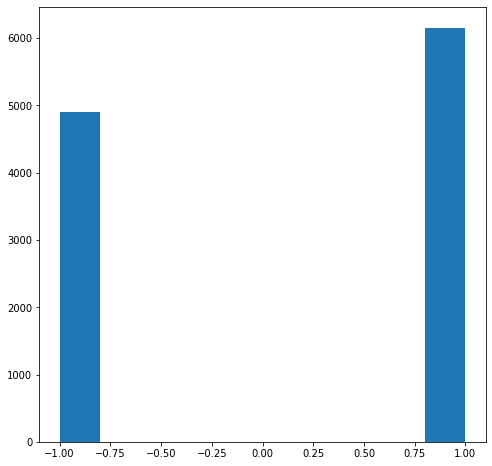

In [7]:
plt.rcParams['figure.figsize']=(8,8)
plt.hist(main_df.Result)

In [8]:
main_df.duplicated().sum()

5206

In [9]:
main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

In [10]:
main_df.duplicated().sum()

0

(array([3019.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2830.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

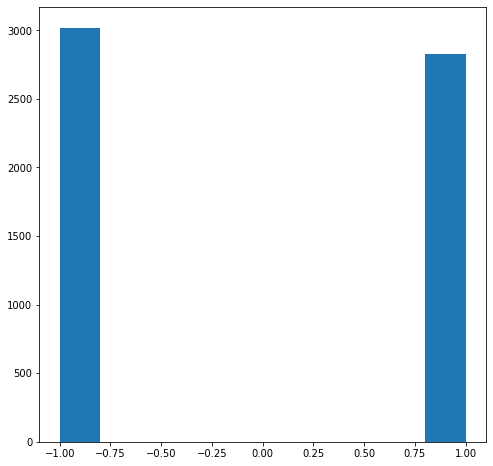

In [11]:
plt.rcParams['figure.figsize']=(8,8)
plt.hist(main_df.Result)

# **Finding correlation among the Features**

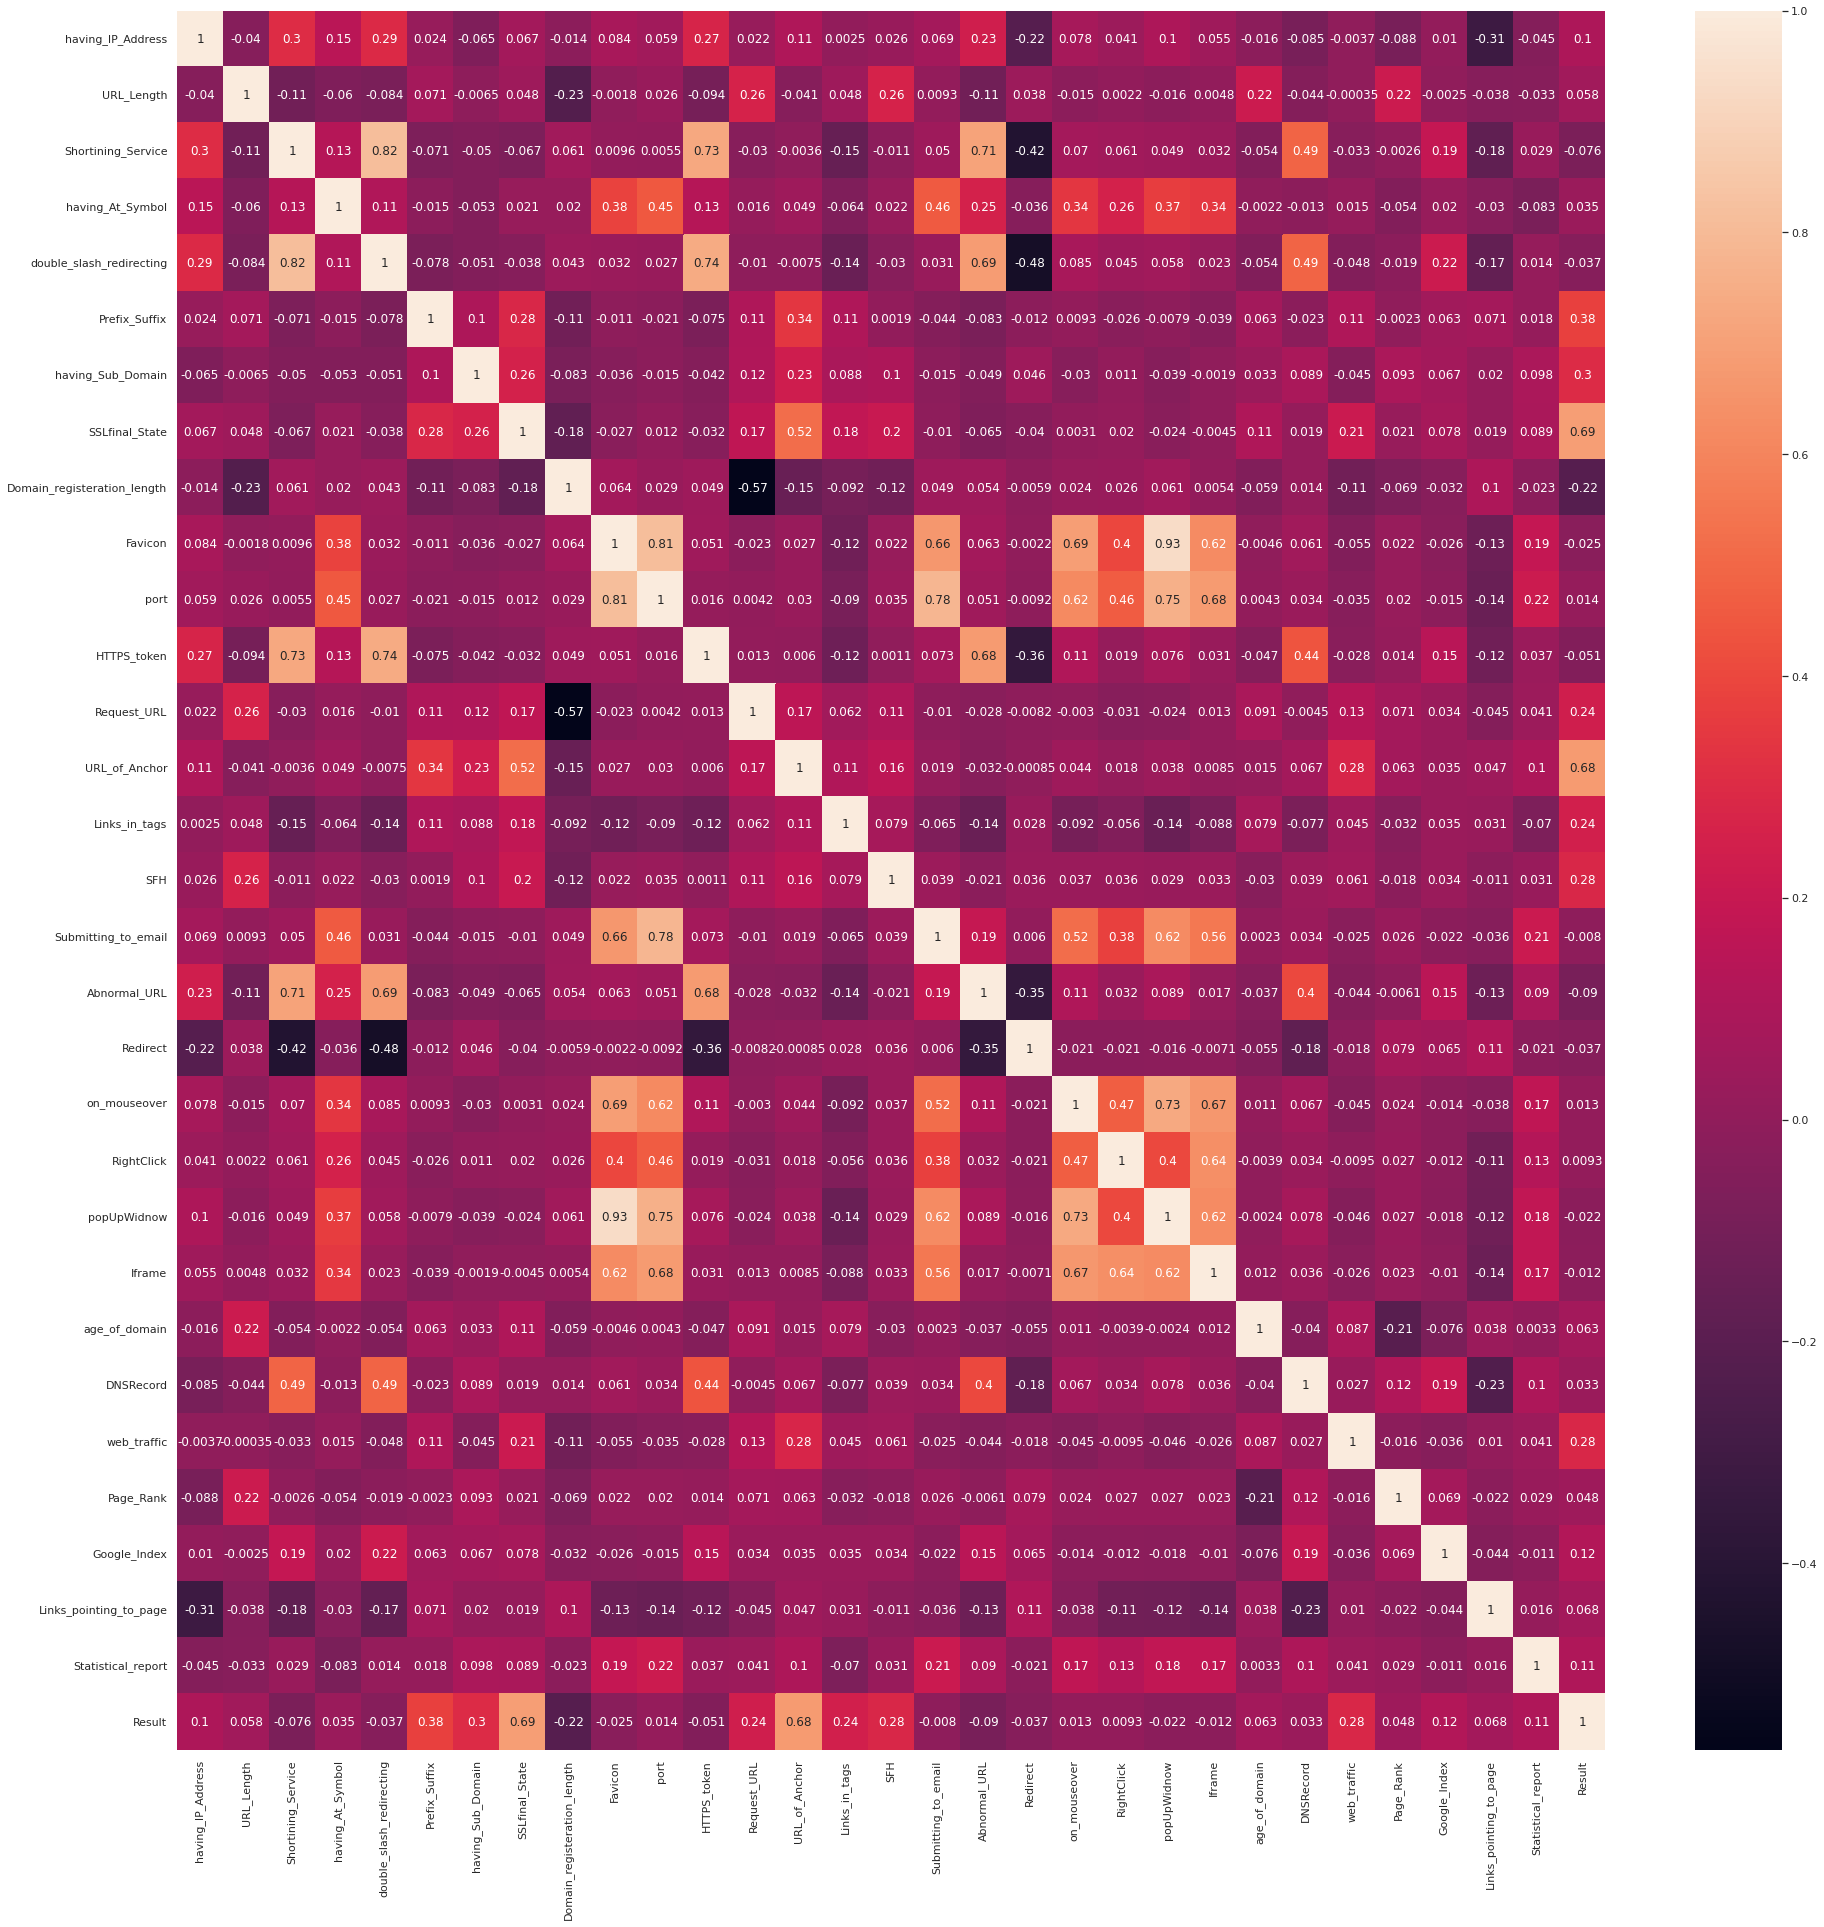

In [12]:
plt.rcParams['figure.figsize'] = [32, 32]
sns.set(font_scale = 1)
sns.heatmap(main_df.corr(), annot = True);

In [13]:
main_df.corr()["Result"].sort_values()

Domain_registeration_length   -0.218623
Abnormal_URL                  -0.090043
Shortining_Service            -0.076166
HTTPS_token                   -0.051412
Redirect                      -0.037462
double_slash_redirecting      -0.036693
Favicon                       -0.025457
popUpWidnow                   -0.022455
Iframe                        -0.011756
Submitting_to_email           -0.008014
RightClick                     0.009286
on_mouseover                   0.012790
port                           0.014201
DNSRecord                      0.033204
having_At_Symbol               0.034757
Page_Rank                      0.048140
URL_Length                     0.058228
age_of_domain                  0.062800
Links_pointing_to_page         0.068463
having_IP_Address              0.104952
Statistical_report             0.108486
Google_Index                   0.118217
Request_URL                    0.237778
Links_in_tags                  0.243864
SFH                            0.281131


In [14]:
# removing features having very less correlation with the result, between +0.01 to -0.03
main_df.drop(["Favicon","Iframe","Redirect","popUpWidnow","RightClick","Submitting_to_email"],axis=1,inplace=True)

In [15]:
main_df.duplicated().sum()

184

In [16]:
main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

In [17]:
main_df.duplicated().sum()

0

(array([2935.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2730.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

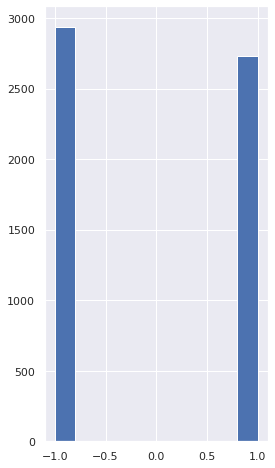

In [18]:
plt.rcParams['figure.figsize']=(4,8)
plt.hist(main_df.Result)

In [19]:
main_df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,...,5665.000000,5665.000000,5665.00000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,0.136805,-0.611297,0.715799,0.584466,0.713327,-0.758517,0.057723,0.146690,-0.303795,0.677670,...,0.672727,0.723566,0.03654,0.466902,0.233186,-0.430891,0.654016,0.347220,0.692145,-0.036187
std,0.990685,0.780690,0.698368,0.811490,0.700893,0.651711,0.804968,0.924316,0.952821,0.735431,...,0.739956,0.690316,0.99942,0.884387,0.826059,0.902483,0.756548,0.580707,0.721822,0.999433
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Label Encoding of the result

In [20]:
column_to_label_encode = main_df["Result"]  # if y=1 means result=1 and y=0 means result=-1 
label_encoder = LabelEncoder()
main_df["Result"] = label_encoder.fit_transform(column_to_label_encode)

In [21]:
main_df["Result"]

0        0
1        0
2        0
3        0
4        1
        ..
11037    0
11045    1
11048    1
11049    0
11054    0
Name: Result, Length: 5665, dtype: int64

In [22]:
main_df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,...,5665.000000,5665.000000,5665.00000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,0.136805,-0.611297,0.715799,0.584466,0.713327,-0.758517,0.057723,0.146690,-0.303795,0.677670,...,0.672727,0.723566,0.03654,0.466902,0.233186,-0.430891,0.654016,0.347220,0.692145,0.481906
std,0.990685,0.780690,0.698368,0.811490,0.700893,0.651711,0.804968,0.924316,0.952821,0.735431,...,0.739956,0.690316,0.99942,0.884387,0.826059,0.902483,0.756548,0.580707,0.721822,0.499717
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **creating the result set and splitting the train and Test datasets for Logistic Regression**

In [23]:
Y=main_df["Result"].values
X=main_df.drop(["Result"],axis=1)
offset=np.ones((X.shape[0],1))
X["offset"]=offset
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=None)
X.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,offset
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,...,5665.000000,5665.000000,5665.00000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.0
mean,0.136805,-0.611297,0.715799,0.584466,0.713327,-0.758517,0.057723,0.146690,-0.303795,0.677670,...,0.672727,0.723566,0.03654,0.466902,0.233186,-0.430891,0.654016,0.347220,0.692145,1.0
std,0.990685,0.780690,0.698368,0.811490,0.700893,0.651711,0.804968,0.924316,0.952821,0.735431,...,0.739956,0.690316,0.99942,0.884387,0.826059,0.902483,0.756548,0.580707,0.721822,0.0
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,1.0
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,1.0
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# **Logistic regression on Multivariate** 

In [24]:
X_train=X_train.T                   # vector Y= (X^T) vector theta
X_test=X_test.T
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
alpha=0.01

In [25]:
X_train.shape

(25, 3399)

In [26]:
Y_train.shape

(3399, 1)

In [27]:
m=Y_train.size
theta=np.ones((X_train.shape[0],1))     # making a theta vector with initial values zero
theta.shape

(25, 1)

In [28]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [29]:
def gradient_descent(x,y,m,theta,alpha,accuracy):
  cost_list=[]   #to record all cost values
  theta_list=theta  #to record all theta values
  prediction_list=[]     #to record all results of our model
  run=True
  cost_list.append(1e10) #intialize cost_list with some large values
  i=0
  while run:
    Z=np.dot(x.T,theta_list)
    prediction=sigmoid(Z)
    prediction_list.append(prediction)
    error=prediction-y
    cost=np.sum(-(y*np.log(prediction)+(1-y)*np.log(1-prediction)))/m  # loss function
    cost_list.append(cost)
    theta_list=theta_list-(alpha*(1/m)*np.dot(x,error))
    if abs(cost_list[i]-cost_list[i+1])<accuracy:
      run=False
    #theta_list=theta
    i+=1
  cost_list.pop(0) # remove the initial large values we added
  return prediction_list,cost_list,theta_list

In [30]:
prediction_list, cost_list,theta_list=gradient_descent(X_train,Y_train,m,theta,alpha,1e-6) #running the gradient descent


In [31]:
theta=theta_list
theta.shape

(25, 1)

In [32]:
theta

array([[ 0.49902606],
       [ 0.01405431],
       [-0.05345693],
       [ 0.21350752],
       [ 0.28241242],
       [ 1.74768444],
       [ 0.66428987],
       [ 1.6593244 ],
       [ 0.02574298],
       [ 0.15049131],
       [-0.343862  ],
       [ 0.31269033],
       [ 2.48310707],
       [ 0.72560265],
       [ 0.88610197],
       [-0.2784545 ],
       [-0.06960874],
       [ 0.03428705],
       [ 0.26727116],
       [ 0.76825661],
       [ 0.0693056 ],
       [ 0.57783935],
       [ 0.74205487],
       [ 0.4086189 ],
       [ 0.62581383]])

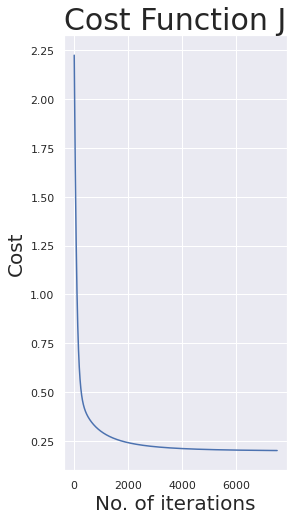

In [33]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

#**Testing the model**

In [34]:
def predict(x,theta):
   Z=np.dot(x.T,theta)
   prediction=sigmoid(Z)
   pred=np.greater(prediction, 1-prediction)
   pred=1*pred
   return pred

In [35]:
predict=predict(X_test,theta)
predict.shape

(2266, 1)

In [36]:
Y_test.shape

(2266, 1)

In [37]:
pred_c=np.array(predict.T[0]) #building a list out of ndarray
pred_c=pred_c.tolist()
len(pred_c)

2266

In [38]:
Y_test_c=np.array(Y_test.T[0])
Y_test_c=Y_test_c.tolist()
len(Y_test_c)

2266

# **F1 Score Accuracy check for logistic regression**

In [39]:
def f1_score(pred,y):
  TP=0
  FP=0
  FN=0
  TN=0
  for i in range(len(y)):
    if pred[i]==1 and y[i]==1:
      TP+=1
    if pred[i]==1 and y[i]==0:
      FP+=1
    if pred[i]==0 and y[i]==1:
      FN+=1
    if pred[i]==0 and y[i]==0:
      TN+=1
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  F1_score=(2*precision*recall)/(precision+recall)
  return F1_score

In [40]:
F1_scor=f1_score(pred_c,Y_test_c)
F1_scor #checking the accuracy of our model

0.9176578225068619

# **Splitting Train and Test dataframe for knaive bayes classifier**

In [41]:
kb_train, kb_test =train_test_split(main_df,test_size=0.4,random_state=None)
kb_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
8292,-1,0,-1,1,1,-1,0,1,-1,1,...,1,-1,-1,1,1,-1,1,1,1,1
924,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,-1,1,0,1,1
153,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,1,1,-1,1,-1,1,1
7174,-1,-1,1,1,1,1,1,1,-1,1,...,1,1,-1,1,1,1,1,0,1,1
2457,1,-1,1,1,1,-1,1,-1,1,1,...,1,1,1,-1,1,-1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,-1,1,0,1,1,0,1,1
5428,-1,1,-1,1,-1,-1,0,1,-1,1,...,-1,1,1,-1,1,-1,-1,1,1,1
775,1,-1,1,1,1,-1,0,0,1,1,...,1,1,1,-1,-1,-1,-1,1,1,0
10884,1,-1,1,1,1,-1,1,-1,1,1,...,1,1,-1,1,0,-1,1,1,1,0


# **Knaive Bayes Classification**

In [42]:
X1=X.drop(["offset"],axis=1)
Xkb_train, Xkb_test, Ykb_train,Ykb_test=train_test_split(X1,Y,test_size=0.3,random_state=None)
Xkb_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
2144,1,-1,1,1,1,-1,1,-1,1,1,...,-1,1,1,1,1,-1,-1,1,0,1
6962,1,-1,1,1,1,-1,-1,1,-1,1,...,0,1,1,-1,1,1,-1,1,0,1
5542,1,-1,1,1,1,-1,1,1,-1,1,...,-1,1,1,-1,1,0,-1,1,0,1
7501,-1,-1,1,1,1,-1,-1,-1,-1,1,...,0,1,1,-1,1,-1,-1,1,0,1
5237,-1,-1,-1,-1,-1,-1,0,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,-1,-1,1,1,1,1,1,-1,-1,1,...,-1,1,1,-1,1,-1,1,1,1,1
8829,1,-1,1,1,1,-1,0,0,-1,1,...,-1,1,1,1,1,1,-1,1,0,1
5140,1,1,1,-1,1,-1,0,1,-1,1,...,-1,-1,1,-1,1,0,1,1,0,1
10358,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,1,1,-1,1,1,1


In [43]:
#calculating P(Y=1)
p_true=np.count_nonzero(Ykb_train)/len(Ykb_train)
p_true

0.4764186633039092

In [44]:
#calculating P(Y=0)
p_false=1-p_true
p_false

0.5235813366960909

In [45]:
def gaussian(mean,var,x):   #gausian function
  denom=np.prod(np.sqrt(2.0*np.pi*var))
  power=-1.0*(x-mean)*(x-mean)/(2.0*var)
  return np.prod(np.exp(power))/denom

In [46]:
Xkb_train=Xkb_train.to_numpy()
Xkb_test=Xkb_test.to_numpy()

In [47]:
Xkb_train.shape

(3965, 24)

In [48]:
Xkb_test.shape

(1700, 24)

# **Train our Model**

In [49]:
x_true=[]
x_false=[]
for i in range(len(Ykb_train)):
  if(Ykb_train[i]==1):
    x_true.append(Xkb_train[i])
  else:
    x_false.append(Xkb_train[i])

In [50]:
#finding the mean and variance
true_mean=np.mean(x_true,axis=0)
true_var=np.var(x_true,axis=0)
false_mean=np.mean(x_false,axis=0)
false_var=np.var(x_false,axis=0)
false_var[5]=0.00000001 #at the 5th feature the variance is equal to zero which is creating problem so, i just replaced it with a very small number

In [51]:
def likelihood(x):
  p_x_false=gaussian(false_mean,false_var,x)
  p_x_true=gaussian(true_mean,true_var,x)
  p_true_output=p_x_true*p_true
  p_false_output=p_x_false*p_false
  if p_true_output > p_false_output:
    return 1
  return 0

# predicting using model

In [52]:
def Naive_Bayes(rows):
  y_pred=[]
  for i in range(rows):
    y_pred.append(likelihood(Xkb_test[i]))
  return y_pred

In [53]:
rows=len(Xkb_test)
ykb_predict=Naive_Bayes(rows)
type(ykb_predict)

list

In [54]:
Ykb_test=np.array(Ykb_test.T)
type(Ykb_test)

numpy.ndarray

In [55]:
Ykb_test=Ykb_test.tolist()

# **Finding the F1 score**

In [56]:
F1_scor=f1_score(ykb_predict,Ykb_test)
F1_scor #checking the accuracy of our model

0.5053191489361702